# Titanic Dataset

The goal is to predict whether a passenger survived the Titanic using binary classification

### Step 1: Data Exploration

In [55]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
df = pd.read_csv('assets/train.csv')

# Display the first few rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# drop the ticket column as it's not likely to contain any useful information
df.drop('Ticket', axis=1, inplace=True)

### We have the training data loaded. The train.csv file contains the details of a subset of the passengers on board the Titanic, along with a Survived column indicating whether each passenger survived the disaster.

### Now, let's explore the data and understand each column:

**PassengerId**: Unique ID assigned to each passenger.

**Survived**: This is our target variable which we're trying to predict. It's a binary variable where '1' indicates that the passenger survived and '0' indicates that they did not.

**Pclass**: This is the ticket class and can be seen as a proxy for socio-economic status. It's a categorical variable with '1' for 1st class, '2' for 2nd class, and '3' for 3rd class.

**Name**: The name of the passenger.

**Sex**: The gender of the passenger, either 'male' or 'female'.

**Age**: The age of the passenger.

**SibSp**: This indicates the number of siblings or spouses the passenger had aboard the Titanic.

**Parch**: This indicates the number of parents or children the passenger had aboard the Titanic.

**Ticket**: The ticket number of the passenger.

**Fare**: How much the passenger paid for the ticket.

**Cabin**: The cabin number where the passenger stayed.

**Embarked**: The port where the passenger embarked. It's a categorical variable with 'C' for Cherbourg, 'Q' for Queenstown, and 'S' for Southampton.

In [57]:
# Quick overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### This output gives us some important information about the structure of the dataset:

**Missing Values**: The Age, Cabin, and Embarked columns have missing values. For Age, we might want to fill in missing values using an approach that makes sense given the distribution and nature of the data, like using median age. Cabin has a large number of missing values (687 out of 891), and might not add much value to our predictions. It could be dropped or engineered into a simpler feature like "Cabin Known: Yes/No". For Embarked, as there are only two missing values, we could fill in with the most common embarkation point.

**Data Types**: There are three kinds of data types in our dataset: integers (int64), floats (float64), and objects. Object usually means that the data type is string, but it might also be used for other data types that pandas doesn't recognize. We will need to encode the categorical variables (Sex, Embarked) into numerical ones, as machine learning algorithms work with numerical data. The Name and Ticket columns may require special treatment or might be dropped, depending on whether we think they'll be useful.

**Number of Entries**: All columns have 891 entries except for the ones with missing values. This consistency is important, otherwise we would need to investigate why there are mismatches.

**Potential Feature Engineering**: SibSp and Parch represent the number of siblings/spouses and parents/children aboard. We might create a new feature called FamilySize by adding these two together + 1 (the passenger themself).

With this information, we can move on to the next steps of data cleaning and feature engineering.

In the data cleaning and feature engineering steps, we want to make sure our data is in a form that's amenable to the kind of analysis we want to perform. This involves handling missing data, dealing with outliers, encoding categorical variables, and potentially creating new features that might give us more predictive power.

Here are some steps we can follow:

### 1. **Dealing with Missing Data**

a. **Age**: This column has 177 missing values. We could fill the missing values with the median age. The median is often a better choice than the mean for data with outliers, which age might have (very young and very old passengers).

b. **Cabin**: This column has a lot of missing values (687 out of 891). Since there's so much missing, it might not be very useful in its current form. We could transform this column into a binary one: known (1) or unknown (0).

c. **Embarked**: There are only 2 missing values. We could fill in these values with the most common embarkation point.

### 2. **Encoding Categorical Variables**

a. **Sex**: This is a binary categorical variable. It could be encoded as 0 (male) and 1 (female).

b. **Embarked**: This is a multi-class categorical variable. One-hot encoding can be used here to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column.

### 3. **Feature Engineering**

a. **Name**: We can extract titles (Mr, Mrs, Miss, etc) from the name, which might give us additional information about the passenger's social status that could be informative.

b. **FamilySize**: We can create a new feature called FamilySize that is the sum of SibSp and Parch plus one (the passenger themself).

c. **IsAlone**: A binary feature indicating if the passenger is alone. It could be derived from FamilySize.

d. **FareBin and AgeBin**: It can be useful to transform continuous variables into categorical ones. We can create categorical bins for Fare and Age.

e. **Ticket**: The ticket column might be dropped, as it is unlikely to contain useful information. The exception would be if there are shared ticket numbers among passengers (which might indicate groups travelling together), but this would require additional exploration.

Remember, these are general suggestions and might need to be adapted based on the specifics of the dataset and the results of exploratory data analysis. All changes should be motivated by a solid understanding of the data and the problem we're trying to solve.

In [58]:
# Calculate the median of the 'Age' column
median_age = df['Age'].median()

# Fill the missing values in the 'Age' column with the median value
df['Age'].fillna(median_age, inplace=True)

# Transform 'Cabin' column to 'Known' (1) if a cabin is assigned, and 'Unknown' (0) otherwise
df['Cabin'] = df['Cabin'].apply(lambda x: 1 if pd.notnull(x) else 0)

# Fill the missing values in the 'Embarked' column with the most frequent value
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)

# Encode 'Sex' column to 0-Male and 1-Female
df['Sex'] = df['Sex'].apply(lambda x: 1 if 'female' in x else 0)

# create a new feature called FamilySize that is the sum of SibSp and Parch plus one (the passenger themself).
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# create a new feature called IsAlone that is 1 if the passenger is alone and 0 otherwise (derived from FamilySize)
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# create a new feature called Title that extracts titles from names
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# create a new feature called FareBin that bins the fare into 4 equally sized bins
df['FareBin'] = pd.qcut(df['Fare'], 4)
# create a new feature called FareBin_Code that maps the FareBin to a numerical value
df['FareBin_Code'] = df['FareBin'].astype('category').cat.codes

# create a new feature called AgeBin that bins the age into 5 equally sized bins
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)
# create a new feature called AgeBin_Code that maps the AgeBin to a numerical value
df['AgeBin_Code'] = df['AgeBin'].astype('category').cat.codes



In [60]:
# Convert Embarked to new columns Embarked_C, Embarked_Q and Embarked_S and assign a 1 or 0 to each column
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [62]:
df.head(10).to_csv('assets/processed_data.csv', index=False)

In [53]:
# Generate descriptive statistics
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,FareBin_Code,AgeBin_Code
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.228956,1.904602,0.602694,1.497194,1.288440
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.420397,1.613459,0.489615,1.118156,0.812038
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.500000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000,2.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,1.000000,3.000000,4.000000


In [54]:
# Find the correlation between different numerical columns
df.corr()

C:\Users\kyle0\AppData\Local\Temp\ipykernel_8156\2014142984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,FareBin_Code,AgeBin_Code
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,0.019919,-0.040143,0.057462,-0.022998,0.026528
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.316912,0.016639,-0.203367,0.299357,-0.044492
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.725541,0.065997,0.135207,-0.634271,-0.358005
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.140391,0.200988,-0.303646,0.243613,-0.071125
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,0.240314,-0.245619,0.171647,0.084434,0.939146
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.040460,0.890712,-0.584471,0.393025,-0.218846
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.036987,0.783111,-0.583398,0.393881,-0.134014
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.482075,0.217138,-0.271832,0.579345,0.124322
Cabin,0.019919,0.316912,-0.725541,0.140391,0.240314,-0.040460,0.036987,0.482075,1.000000,-0.009175,-0.158029,0.500936,0.260538
FamilySize,-0.040143,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.217138,-0.009175,1.000000,-0.690922,0.465396,-0.216525


### Since 'Survived' is our target variable. Here's what can be inferred from the correlations with Survived:

1. **Survived and Pclass**: There's a negative correlation between Survived and Pclass (-0.338). As the class increases (or socio-economic status decreases), the chances of survival decrease.

2. **Survived and Age**: The correlation between Survived and Age is slightly negative (-0.077). This indicates a slight tendency for younger passengers to have survived, although the relationship is weak.

3. **Survived and SibSp**: The correlation here is also slightly negative (-0.035). This suggests that those with fewer siblings or spouses aboard were slightly more likely to survive, but the effect is very small.

4. **Survived and Parch**: There's a positive correlation between Survived and Parch (0.082). It indicates that passengers with parents or children aboard were slightly more likely to survive, but again the effect is small.

5. **Survived and Fare**: There's a moderate positive correlation between Survived and Fare (0.257). This suggests that passengers who paid more (probably those in higher classes) were more likely to survive.

These inferences provide some good hints about which features might be particularly important to consider when building the machine learning model.

It's also important to keep in mind that correlation is a measure of linear relationships between variables, and it's entirely possible that there are non-linear relationships in the data that won't be captured by these correlation values. Moreover, correlations do not account for interactions between variables, so always consider these figures within the bigger picture.

From the correlation matrix, we can infer a few things about the relationship between the different variables:

1. **Pclass and Fare**: There's a strong negative correlation (-0.549) between Pclass and Fare, which makes sense as first class tickets are more expensive than third class tickets.

2. **Pclass and Age**: There is a negative correlation (-0.369) between Pclass and Age, suggesting that older passengers were more likely to be in higher classes.

3. **Age and SibSp, Parch**: Age has a negative correlation with SibSp and Parch, which makes sense as younger passengers (children) are more likely to be traveling with parents/siblings.

4. **SibSp and Parch**: There is a positive correlation (0.414) between SibSp and Parch. This makes sense, as families tend to travel together.

Remember, these are just correlations. Correlation does not imply causation. While they give us some clues about potential relationships between variables, further analysis would be needed to establish any definitive conclusions.

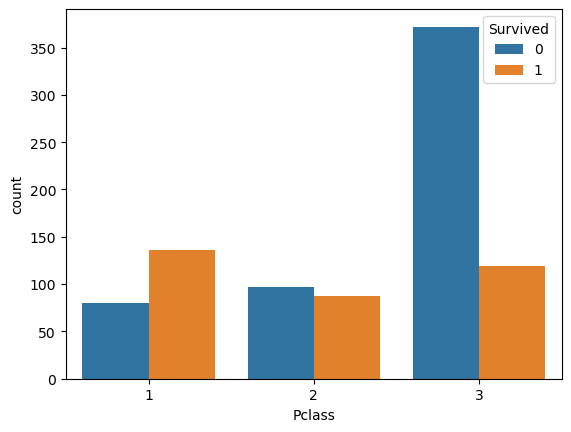

In [14]:
# Bar plots for categorical columns like Pclass, Sex, and Embarked
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()


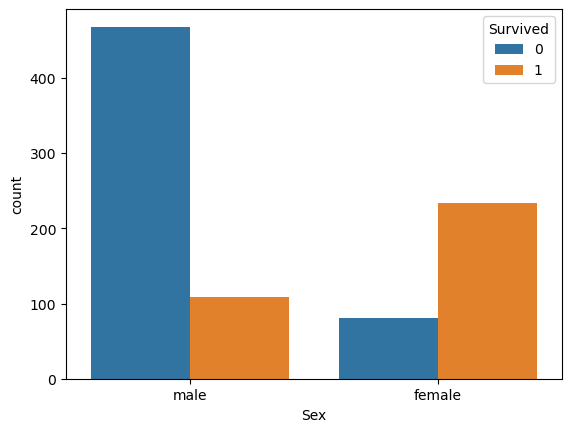

In [15]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

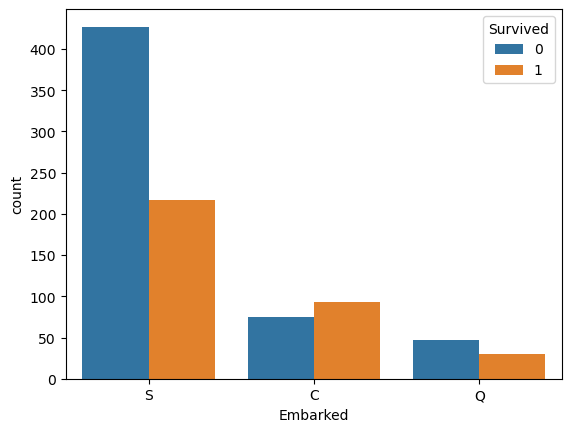

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()